<a href="https://colab.research.google.com/github/khan4khalid/Anudip-/blob/lab-work/numpy_pandas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Orders.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()


,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [3]:
df.describe()

,Order ID,Order Date,CustomerName,State,City
count,500,500,500,500,500
unique,500,307,336,19,25
top,B-26055,24-11-2018,Shreya,Maharashtra,Indore
freq,1,7,6,94,71


In [5]:
df.columns

Index(['Order ID', 'Order Date', 'CustomerName', 'State', 'City'], dtype='object')

In [7]:
df


,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore
...,...,...,...,...,...
495,B-25742,03-08-2018,Ashwin,Goa,Goa
496,B-26088,26-03-2018,Bhavna,Sikkim,Gangtok
497,B-25707,01-07-2018,Shivani,Maharashtra,Mumbai
498,B-25758,22-08-2018,Shubham,Himachal Pradesh,Simla


In [20]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Details.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [21]:
df.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


In [22]:
df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card
...,...,...,...,...,...,...,...
1495,B-25700,7,-3,2,Clothing,Hankerchief,COD
1496,B-25757,3151,-35,7,Clothing,Trousers,EMI
1497,B-25973,4141,1698,13,Electronics,Printers,COD
1498,B-25698,7,-2,1,Clothing,Hankerchief,COD


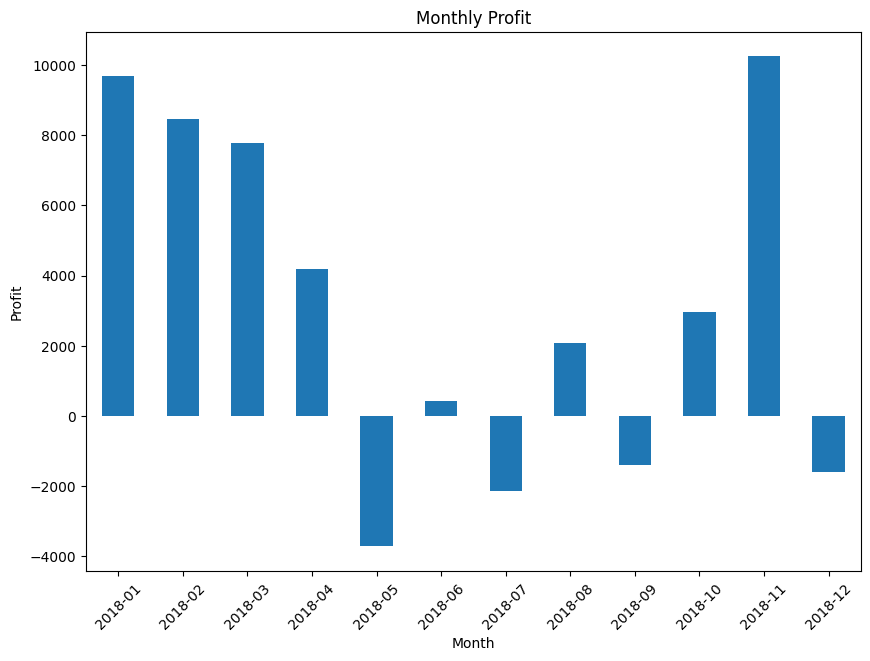

In [12]:
import pandas as pd

orders_df = pd.read_csv('Orders.csv')
details_df = pd.read_csv('Details.csv')

orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'], format='%d-%m-%Y')

merged_df = pd.merge(orders_df, details_df, on='Order ID')

merged_df['Month'] = merged_df['Order Date'].dt.to_period('M')

profit_by_month = merged_df.groupby('Month')['Profit'].sum()

profit_by_month.plot(kind='bar', stacked=False, figsize=(10, 7))

plt.title('Monthly Profit')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

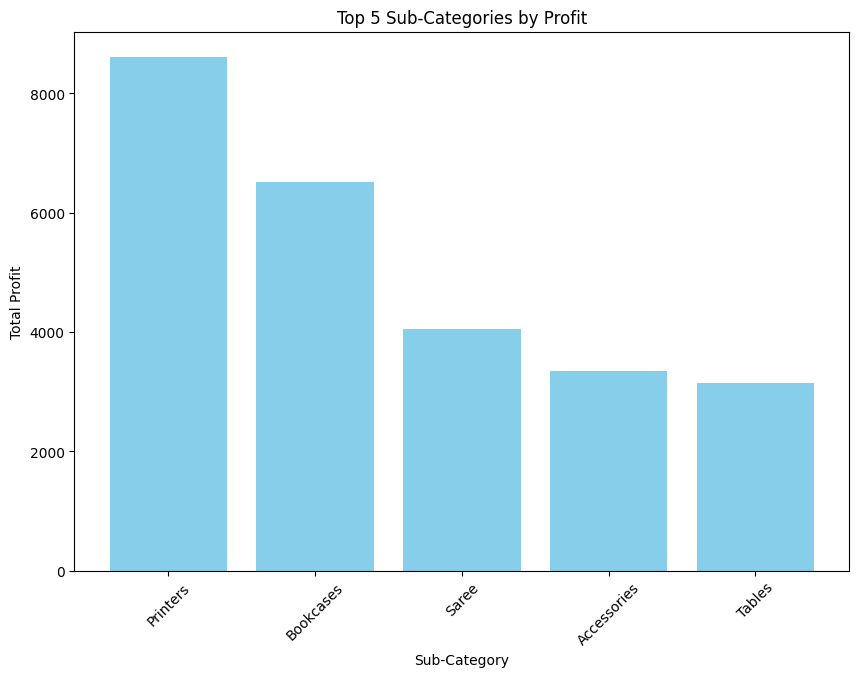

In [13]:
import matplotlib.pyplot as plt

profit_by_sub_category = merged_df.groupby('Sub-Category')['Profit'].sum().reset_index()

top_5_sub_categories = profit_by_sub_category.nlargest(5, 'Profit')

plt.figure(figsize=(10, 7))
plt.bar(top_5_sub_categories['Sub-Category'], top_5_sub_categories['Profit'], color='skyblue')

plt.title('Top 5 Sub-Categories by Profit')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

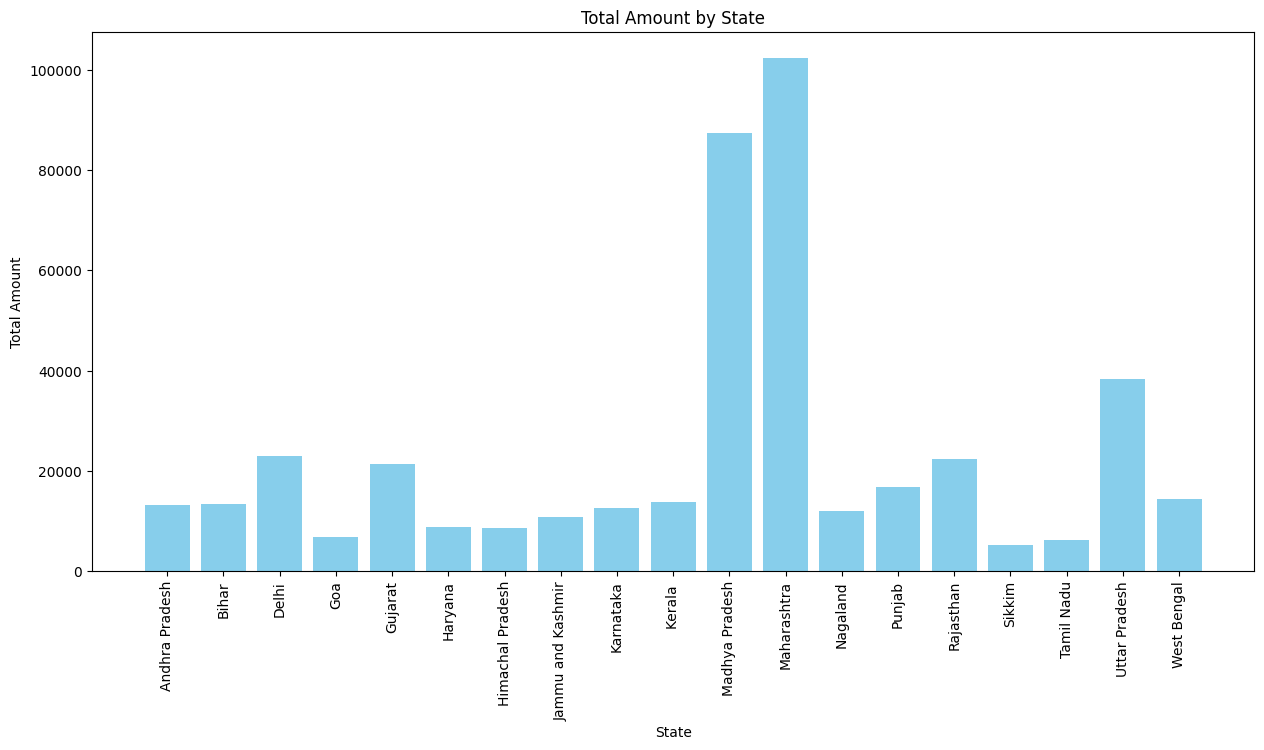

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

amount_by_state = merged_df.groupby('State')['Amount'].sum().reset_index()

plt.figure(figsize=(15, 7))
plt.bar(amount_by_state['State'], amount_by_state['Amount'], color='skyblue')

plt.title('Total Amount by State')
plt.xlabel('State')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.show()

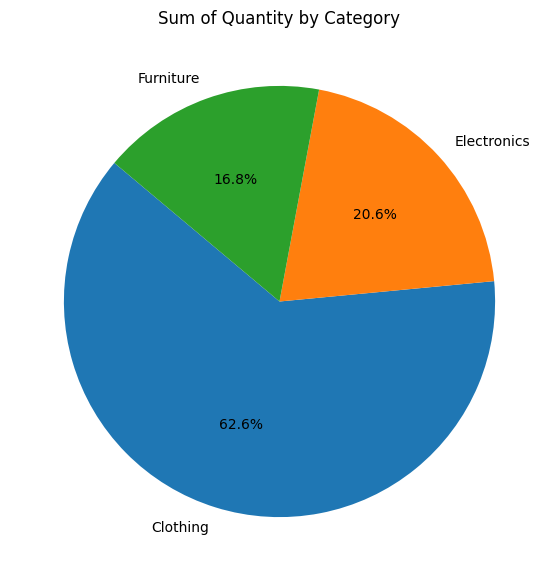

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


orders_df = pd.read_csv('Orders.csv')
details_df = pd.read_csv('Details.csv')


orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'], format='%d-%m-%Y')

merged_df = pd.merge(orders_df, details_df, on='Order ID')


quantity_by_category = merged_df.groupby('Category')['Quantity'].sum().reset_index()


plt.figure(figsize=(10, 7))
plt.pie(quantity_by_category['Quantity'], labels=quantity_by_category['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Sum of Quantity by Category')
plt.show()

In [19]:
import pandas as pd


orders_df = pd.read_csv('Orders.csv')
details_df = pd.read_csv('Details.csv')


orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'], format='%d-%m-%Y')


merged_df = pd.merge(orders_df, details_df, on='Order ID')


merged_df['state'] = merged_df['Order Date'].dt.to_period('M')


profit_by_month = merged_df.groupby('quantity')('state')


profit_by_month.plot(kind='bar', stacked=False, figsize=(10, 7))

plt.title('sum of quantity by state')
plt.xlabel('quantity')
plt.ylabel('state')
plt.xticks(rotation=45)
plt.show()

KeyError: 'quantity'